In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#изменить размер графика
sns.set(rc = {'figure.figsize':(12,4)} )

<p>Описание данных:</p>

<p><a href="https://stepik.org/media/attachments/course/4852/event_data_train.zip">
    <strong>events_train.csv</strong></a> - данные о действиях, которые совершают студенты со стэпами</p>

<ol>
	<li><strong>step_id</strong>&nbsp;- id стэпа</li>
	<li><strong>user_id</strong> - анонимизированный id юзера</li>
	<li><strong>timestamp</strong>&nbsp;- время наступления события в формате unix date</li>
	<li><strong>action</strong>&nbsp;- событие, возможные значения:&nbsp;</li>
</ol>

<ul>
	<li><em>discovered</em> - пользователь перешел на стэп</li>
	<li><em>viewed</em> - просмотр шага,</li>
	<li><em>started_attempt</em> - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага</li>
	<li><em>passed</em> - удачное решение практического шага</li>
</ul>

<p><a href="https://stepik.org/media/attachments/course/4852/submissions_data_train.zip">
    <strong>submissions_train.csv</strong></a> - данные о времени и статусах сабмитов к практическим заданиям</p>

<ol>
	<li><strong>step_id</strong>&nbsp;-&nbsp;id стэпа</li>
	<li><strong>timestamp - </strong>время отправки&nbsp;решения в формате unix date</li>
	<li><strong>submission_status - </strong>статус решения</li>
	<li><strong>user_id </strong>- анонимизированный id юзера</li>
</ol>

<p><a href = "https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a481">
    <strong>Work With Dates In Pandas Like a Pro</strong></a></p>

In [18]:
events = pd.read_csv("dataset/event_data_train.csv")
events['date'] = pd.to_datetime(events.timestamp, unit= 's')
events.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [19]:
print("Shape {}        unique users {}".format(events.shape,events.user_id.unique().size))
print("Date: {}  - {} ".format(events.date.min(),events.date.max()))
events.action.unique()

Shape (3480703, 5)        unique users 19234
Date: 2015-06-15 04:00:48  - 2018-05-19 23:33:31 


array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [22]:
events['day'] = events.date.dt.date
events.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:xlabel='day'>

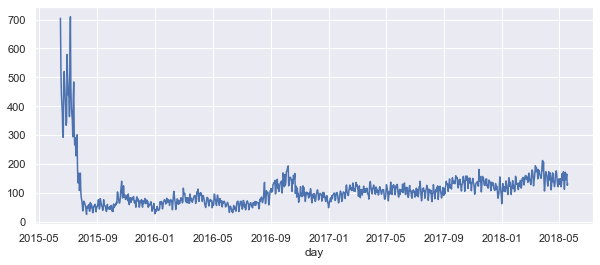

In [33]:
events.groupby("day").user_id.nunique().plot()

<AxesSubplot:>

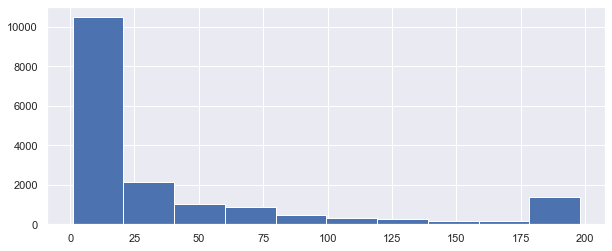

In [77]:
events[events.action == 'passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}) \
      .rename(columns = {'step_id':'passed_step'} ).passed_step.hist()

<AxesSubplot:>

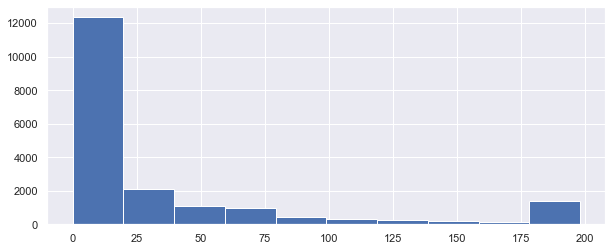

In [78]:
events.pivot_table(index = 'user_id',
                   columns='action',
                   values = 'step_id',
                   aggfunc= 'count',
                   fill_value=0).reset_index().passed.hist()


<AxesSubplot:>

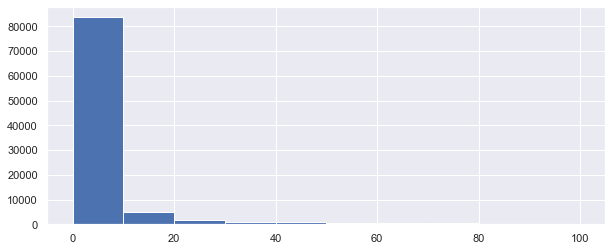

In [140]:
#Дни когда юзер был онлайн
user_days = events[['user_id','day','timestamp']].drop_duplicates(['user_id','day'])
#создать список когда юзер заходил
user_days = user_days.groupby('user_id')['timestamp'].apply(list)
#Разница между ближайшими входами в днях
gap_data = user_days.apply(np.diff).values/(24*3600)
gap_data = pd.Series(np.concatenate(gap_data, axis=0)) 
#gap_data.hist()
gap_data[gap_data < 100].hist()


In [145]:
#Через сколько дней заходят 75% пользователей
gap_data.quantile(0.75)

4.147340856481482

In [108]:
submissions = pd.read_csv("dataset/submissions_data_train.csv")
submissions['date'] = pd.to_datetime(submissions.timestamp, unit= 's')
submissions['day'] = submissions.date.dt.date
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [109]:
user_scores = submissions.pivot_table(index = 'user_id',
                   columns='submission_status',
                   values = 'step_id',
                   aggfunc= 'count',
                   fill_value=0).reset_index()

In [105]:
user_scores

user_scores[( user_scores.correct > user_scores.correct.max()-10)]
#user_scores[( user_scores.wrong == user_scores.wrong.max())]


submission_status,user_id,correct,wrong
439,1046,421,513
